In [6]:
import random
import sage.graphs.graph_plot
from sage.graphs.base.boost_graph import *
from sage.plot.point import *
import numpy

In [7]:
def seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena):
    sur_podatki = []
    for i in range(0, st_opazanj):
        mer_povezav = []
        for j in range(0, st_pov_grafa):
            mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))
        sur_podatki.append(mer_povezav)
    return(sur_podatki)

#stevilo_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc

In [9]:
def mnoz(vektor1, vektor2):
    matrika = []
    for i in range(0,len(vektor1)):
        vrstica =[]
        for j in range(0, len(vektor2)):
            vrstica.append(vektor1[i] * vektor2[j])
        matrika.append(vrstica)
    return(matrika)

def kov_matrika(vse_utezi):
    avr_pov = [i * 1/len(vse_utezi) for i in [sum(x) for x in zip(*vse_utezi)]]
    #zac_mat = numpy.matrix(mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov)))
    zac_mat = mnoz(numpy.subtract(vse_utezi[0],avr_pov),numpy.subtract(vse_utezi[0],avr_pov))
    for i in range(1, len(vse_utezi)):
        #zac_mat += numpy.matrix(mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
        zac_mat = numpy.add(zac_mat, mnoz(numpy.subtract(vse_utezi[i],avr_pov),numpy.subtract(vse_utezi[i],avr_pov)))
    kon_mat = numpy.dot(1/len(vse_utezi), zac_mat)
    return(kon_mat)

In [10]:
def vektorcki_x(graf, zacetno, koncno):
    vse_poti = graf.all_paths(zacetno, koncno, use_multiedges=True, report_edges=False, labels=False)
    vse_povezave = graf.edges()
    par = []
    for i in range(0,len(vse_povezave)):
        par.append(vse_povezave[i][0:2])
    seznam_vektorjev = []
    for i in range(0, len(vse_poti)):
        pot = (vse_poti[i])
        prvi_oklepaj1 = list(zip(pot, pot[1:] + pot[:1]))
        prvi_oklepaj = prvi_oklepaj1[:-1]
        x=[]
        for i in range(0, len(par)):
            if par[i] in prvi_oklepaj:
                x.append(1)
            else:
                x.append(0)
        seznam_vektorjev.append(x)
    return(seznam_vektorjev)

<ipython-input-7-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


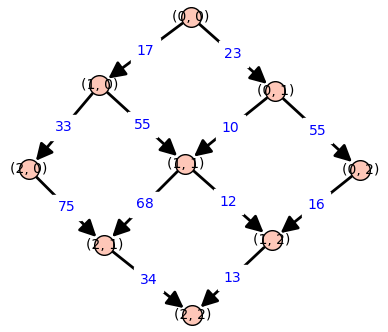

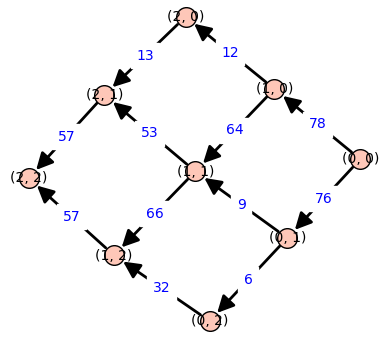

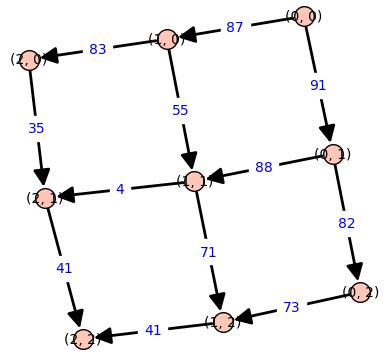

[Digraph on 9 vertices, Digraph on 9 vertices, Digraph on 9 vertices]


In [14]:
def grid_graf(st_opazanj, st_vozlisc, min_cena, max_cena):
    st_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc
    utezi = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    #graf_seznam = vsa_vozlisca(st_vozlisc, st_pov_grafa)
    graf_seznam = graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges()
    nov = [] #najprej spremeniva v list
    for i in range(0,len(graf_seznam)):
        nov.append(list(graf_seznam[i]))
    konec = [] #dodava še ceno, v obliki ki jo sprjema digraph
    seznam_grafov = []
    for j in range(0,len(utezi)):
        zadnji = []
        for i in range(0,len(nov)):
            vmesni = []
            vmesni.append(nov[i][0])
            vmesni.append(nov[i][1])
            vmesni.append(utezi[j][i])
            zadnji.append(tuple(vmesni))
        konec.append(zadnji)
        gr = DiGraph(zadnji)
        seznam_grafov.append(gr)
    #seznam_gra[0].show(edge_labels = True)
    return(seznam_grafov, utezi)

[seznam_g, utezke] = grid_graf(3, 3, 1, 100)
seznam_g[0].show(edge_labels = True)
seznam_g[1].show(edge_labels = True)
seznam_g[2].show(edge_labels = True)
print(seznam_g)

In [8]:
def min_grid_graf(st_opazanj, st_vozlisc, min_cena, max_cena):
    st_pov_grafa = 2 * st_vozlisc^2 - 2 * st_vozlisc
    utezi = seznam_cen(st_opazanj, st_pov_grafa, min_cena, max_cena)
    graf_oblika = DiGraph(graphs.Grid2dGraph(st_vozlisc, st_vozlisc).edges())
    return(graf_oblika, utezi)

#[grafkec, utezi] = min_grid_graf(3, 3, 1, 100)

In [9]:
def argmin(poti, av_pov, diagonala):
    x_min = poti[0]
    cena_pov = numpy.dot(av_pov, x_min)
    cena_d = numpy.dot(diagonala, x_min)
    cena = cena_pov + cena_d
    #cena = numpy.dot(numpy.add(av_pov, diagonala), poti[0])
    #if len(poti) == 1:
    #    return(x_min, cena_pov, cena_d, cena)
    #else:
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_pov_nov = numpy.dot(av_pov, x_nov)
        cena_d_nov = numpy.dot(diagonala, x_nov)
        cena_nov = cena_pov_nov + cena_d_nov
        #cena_nov = numpy.dot(numpy.add(av_pov,diagonala), poti[i])
        if cena_nov < cena:
            x_min = x_nov
            cena_pov = cena_pov_nov
            cena_d = cena_d_nov
            cena = cena_nov
    return(x_min, cena_pov, cena_d, cena)

In [10]:
def arglexmin(seznam_x, vektorji):
    xmin = min(([numpy.dot(numpy.array(v), numpy.array(x)) for v in vektorji], x) for x in seznam_x)
    return xmin

In [11]:
def argmin_kor(poti, av_pov, diagonala):
    x_rob = poti[0]
    cena_av = numpy.dot(x_rob, av_pov)
    cena_d = sqrt(numpy.dot(x_rob, diagonala))
    cena = cena_av + cena_d
    for i in range(1, len(poti)):
        x_nov = poti[i]
        cena_av_nov = numpy.dot(poti[i], av_pov)
        cena_d_nov = sqrt(numpy.dot(poti[i], diagonala))
        cena_nov = cena_av_nov + cena_d_nov
        if cena_nov < cena:
            x_rob = x_nov
            cena = cena_nov
    return(x_rob, cena)

In [12]:
##[grafi, weights] = grid_graf(50, 9, 1, 100)
[grafi, weights] = min_grid_graf(50 , 3, 1, 100)
####g = grafi[0]
####g.show(edge_labels = True)
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
####print(povprecje_w)
####print(kov_matrika(weights))
diagonalci = numpy.diag(kov_matrika(weights))
####print(diagonalci)
####xi = vektorcki_x(grafi[0], (0, 0), (8, 8))
xi = vektorcki_x(grafi, (0, 0), (2, 2))
####print(weights)
####print(xi)
###print("dolzina xi je", len(xi))
###
xl = arglexmin(xi, [povprecje_w, diagonalci])
xl_vekt = xl[1]
####print("xl in njegove vr", xl)
###print(xl_vekt)
xr = arglexmin(xi, [diagonalci, povprecje_w])
xr_vekt = xr[1]
####print("xr in njegove vr", xr)
###print(xr_vekt)
print(xl_vekt == xr_vekt)
#

False


<ipython-input-4-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


In [11]:
#d = numpy.diag(kov_matrika(weights))
#average_c = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
#xl = arglexmin(xi, [average_c, d])
#xr = arglexmin(xi, [d, average_c])
#xl_vekt = xl[1]
#xr_vekt = xr[1]
#prva_tocka = xl[0]
#tretja_tocka = [xr[0][1], xr[0][0]]
#druga_tocka = [prva_tocka[0], tretja_tocka[1]]
#[x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], povprecje_w, diagonalci)
##print(OBJ)
##najprej naredimo prvi interval ter vmesno točko m
#a = prva_tocka[0]
#b = OBJ - sqrt(tretja_tocka[1])
#P = numpy.dot(povprecje_w, x_rob)
#D = sqrt(numpy.dot(diagonalci, x_rob))
#
#xevje = []
#def intervali(rob1, rob2, OBJ, x, P, D, xi, average_c, d):
#    m = (rob1 + rob2) / 2
#    alfa_m = 2 * (m -OBJ) / (2 * (m - OBJ) - 1)
#    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
#    if 2 * (m - OBJ) * P - 2 * (m - OBJ) * pov_x_new + diag_x_new <= D:
#        print("x_new boljši.")
#        x = x_new
#        OBJ = pov_x_new + sqrt(diag_x_new)
#        #OBJ = pov_x_new + diag_x_new
#        P = pov_x_new
#        D = sqrt(diag_x_new)
#        #D = diag_x_new
#        naklon = 2 * (m - OBJ)
#        zac_vr = (OBJ - m)^2 - naklon * m
#        var('z')
#        sol = solve(0 == z^2 -(2*OBJ + naklon)*z +(OBJ^2-zac_vr), z)
#        nsol = [N(s.rhs()) for s in sol]
#        if nsol[0].is_real() == False or nsol[1].is_real == False:
#            print("Imaginarna rešitev.")
#        #    return(xevje)
#        print(sol[0])
#        print(sol[1])
#        #print(rob1)
#        if nsol[0] - rob1 > 0.001:
#            print("Prvi interval dovolj velik. Nova rekurzija.")
#            intervali(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d)
#        else:
#            print("Prvi interval minimalen. Dodamo x.")
#            xevje.append(x)
#        if rob2 - nsol[1] > 0.001:
#            print("Drugi interval dovolj velik. Nova rekurzija.")
#            intervali(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d)
#        else:
#            print("Drugi interval minimalen. Dodamo x.")
#            xevje.append(x)
#    else:
#        print("NI boljsega x_new.")
#        var('z')
#        sol = solve(0 == z^2 -(2*OBJ + naklon)*z +(OBJ^2-zac_vr), z)
#        nsol = [N(s.rhs()) for s in sol]
#        if nsol[0].is_real() == False or nsol[1].is_real == False:
#            print("Imaginarna rešitev.")
#        #    return(xevje)
#        if nsol[0] - rob1 > 0.001:
#            intervali(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d)
#        else:
#            xevje.append(x)
#        if rob2 - nsol[1] > 0.001:
#            intervali(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d)
#        else:
#            xevje.append(x)
#    return(xevje)



In [12]:
#intervali(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci)

In [13]:
#improved bolša praksa
prva_tocka = xl[0]
tretja_tocka = [xr[0][1], xr[0][0]]
druga_tocka = [prva_tocka[0], tretja_tocka[1]]
[x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], povprecje_w, diagonalci)

#najprej naredimo prvi interval ter vmesno točko m
a = prva_tocka[0]
b = OBJ - sqrt(tretja_tocka[1])
P = numpy.dot(povprecje_w, x_rob)
D = sqrt(numpy.dot(diagonalci, x_rob))

def intervali1(rob1, rob2, OBJ, x, P, D, xi, average_c, d, xevje, k):
    #xevje=[]
    m = (rob1 + rob2) / 2
    alfa_m = 2 * (m -OBJ) / (2 * (m - OBJ) - 1)
    if alfa_m >= 1:
        return(xevje, k)
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    if 2 * (m - OBJ) * P - 2 * (m - OBJ) * pov_x_new + diag_x_new <= D:
        #print("x_new boljši. Dodamo x.")
        x = x_new
        xevje.append(x)
        #OBJ = pov_x_new + sqrt(diag_x_new)
        #OBJ = pov_x_new + diag_x_new
        P = pov_x_new
        #print("m =", m)
        #print("OBJ =", OBJ)
        #print("alfa_m =", alfa_m)
        #print("diag=", diag_x_new)
        D = sqrt(diag_x_new)
        #D = diag_x_new
        OBJ = P + D
        naklon = 2 * (m - OBJ)
        zac_vr = (OBJ - m)^2 - naklon * m
        var('z')
        sol = solve(0 == z^2 - (2 * OBJ + naklon) * z +(OBJ^2 - zac_vr), z)
        nsol = [N(s.rhs()) for s in sol]
        #nj = nsol[0]
        if nsol[0].is_real() == True and nsol[0] - rob1 > 0.01:
            #print("Prvi interval dovolj velik. Nova rekurzija.")
            k +=1
            intervali1(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d, xevje, k)
        else:
            print("Prvi interval minimalen ali ni preseka(kompleksno).")
        if nsol[1].is_real() == True and rob2 - nsol[1] > 0.01:
            #print("Drugi interval dovolj velik. Nova rekurzija.")
            k += 1
            intervali1(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d, xevje , k)
        else:
            print("Drugi interval minimalen ali ni preseka(kompleksno).")
    else:
        print("NI boljsega x_new.")
        naklon = 2 * (m - OBJ)
        zac_vr = (OBJ - m)^2 - naklon * m
        var('z')
        sol = solve(0 == z^2 - (2 * OBJ + naklon) * z +(OBJ^2 - zac_vr), z)
        nsol = [N(s.rhs()) for s in sol]
        if nsol[0].is_real() == True and nsol[0] - rob1 > 0.01:
            print("Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.")
            k += 1
            intervali1(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d, xevje, k)
        else:
            print("Konec1.")
            #xevje.append(x)
        if nsol[1].is_real() == True and rob2 - nsol[1] > 0.01:
            print("Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija")
            k += 1
            intervali1(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d, xevje, k)
        else:
            print("Konec2.")
            #xevje.append(x)
    return(xevje, k)

#intervali1(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [])

In [14]:
#intervali1(rob1, rob2, OBJ, x, P, D, xi, average_c, d, xevje, k):
intervali1(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [], 1)


Prvi interval minimalen ali ni preseka(kompleksno).


IndexError: list index out of range

In [15]:
import time
import json

tipi_grafov = [3,4,5,6,7,8]
#rezultati = []
casi = []
#casi = []
##stetja = []
for i in range(0, len(tipi_grafov)):
    print("TIP GRAFA ", tipi_grafov[i])
    #rezultati_tipa_grafov = []
    vmesni_casi = []
    #vmesna_stetja = []
    for j in range(0, 3):
        [grafi, weights] = min_grid_graf(50 , tipi_grafov[i], 1, 100)
        diagonalci = numpy.diag(kov_matrika(weights))
        povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
        xi = vektorcki_x(grafi, (0, 0), (tipi_grafov[i] - 1, tipi_grafov[i] - 1 ))
        xl = arglexmin(xi, [povprecje_w, diagonalci])
        xr = arglexmin(xi, [diagonalci, povprecje_w])
        xl_vekt = xl[1]
        xr_vekt = xr[1]
        print(xl_vekt == xr_vekt)
        #while xl_vekt == xr_vekt:
        #    [grafi, weights] = min_grid_graf(50 , tipi_grafov[i], 1, 100)
        #    diagonalci = numpy.diag(kov_matrika(weights))
        #    povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
        #    xi = vektorcki_x(grafi, (0, 0), (tipi_grafov[i] - 1, tipi_grafov[i] - 1 ))
        #    xl = arglexmin(xi, [povprecje_w, diagonalci])
        #    xr = arglexmin(xi, [diagonalci, povprecje_w])
        #    xl_vekt = xl[1]
        #    xr_vekt = xr[1]
        prva_tocka = xl[0]
        tretja_tocka = [xr[0][1], xr[0][0]]
        #druga_tocka = [prva_tocka[0], tretja_tocka[1]]
        [x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], povprecje_w, diagonalci)
        #najprej naredimo prvi interval ter vmesno točko m
        a = prva_tocka[0]
        b = OBJ - sqrt(tretja_tocka[1])
        P = numpy.dot(povprecje_w, x_rob)
        D = sqrt(numpy.dot(diagonalci, x_rob))
        start_time = time.time()
        intervali1(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [], 1)
        celoten_cas = (time.time() - start_time)
        print("NAREJEN GRAF")
        print("Cas za en graf je", celoten_cas)
        #print("Stetje za en graf je", k)
        vmesni_casi.append(celoten_cas)
        #vmesna_stetja.append(k)
    #rezultati_tipa_grafov.append(mean(vmesni_casi))
    print("Povprecje vmesnih casov je", mean(vmesni_casi))
    casi.append(mean(vmesni_casi))
    #rezultati_tipa_grafov.append(mean(vmesna_stetja))
    print("Povprecje vmesnih stetji je", mean(vmesna_stetja))
    #stetja.append(mean(vmesna_stetja))
    #rezultati.append(rezultati_tipa_grafov)
    print("USTVARJENI PODATKI ZA TIP")
    
with open("results_improved_povprecja2.json", 'w') as f:
    #with open('naivni.json', 'w') as f:
    f.write(str(casi))
    ##f.write(str(stetja))

TIP GRAFA  3
False
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


<ipython-input-2-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.


IndexError: list index out of range

In [1]:
# NA NOVO

[grafi, weights] = min_grid_graf(50 , 5, 1, 100)
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
diagonalci = numpy.diag(kov_matrika(weights))
xi = vektorcki_x(grafi, (0, 0), (4, 4))


xl = arglexmin(xi, [povprecje_w, diagonalci])
xl_vekt = xl[1]
xr = arglexmin(xi, [diagonalci, povprecje_w])
xr_vekt = xr[1]


#improved bolša praksa
prva_tocka = xl[0]
tretja_tocka = [xr[0][1], xr[0][0]]
druga_tocka = [prva_tocka[0], tretja_tocka[1]]
[x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], povprecje_w, diagonalci)

#najprej naredimo prvi interval ter vmesno točko m
a = prva_tocka[0]
b = OBJ - sqrt(tretja_tocka[1])
P = numpy.dot(povprecje_w, x_rob)
D = sqrt(numpy.dot(diagonalci, x_rob))

#k = [0]
def intervali1(rob1, rob2, OBJ, x, P, D, xi, average_c, d, xevje,k):
    #k = [0]
    #xevje=[]
    m = (rob1 + rob2) / 2
    alfa_m = 2 * (m -OBJ) / (2 * (m - OBJ) - 1)
    if alfa_m >= 1:
        return(xevje)
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    if 2 * (m - OBJ) * P - 2 * (m - OBJ) * pov_x_new + diag_x_new <= D:
        print("x_new boljši. Dodamo x.")
        x = x_new
        xevje.append(x)
        #OBJ = pov_x_new + sqrt(diag_x_new)
        #OBJ = pov_x_new + diag_x_new
        P = pov_x_new
        print("m =", m)
        print("OBJ =", OBJ)
        print("alfa_m =", alfa_m)
        print("diag=", diag_x_new)
        D = sqrt(diag_x_new)
        #D = diag_x_new
        OBJ = P + D
        naklon = 2 * (m - OBJ)
        zac_vr = (OBJ - m)^2 - naklon * m
        var('z')
        try:
            sol = solve(0 == z^2 - (2 * OBJ + naklon) * z +(OBJ^2 - zac_vr), z)
            nsol = [N(s.rhs()) for s in sol]
            #nj = nsol[0]
            if nsol[0].is_real() == True and nsol[0] - rob1 > 0.00001:
                print("Prvi interval dovolj velik. Nova rekurzija.")
                k+=1
                intervali1(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d, xevje, k)
            #else:
             #   print("Prvi interval minimalen ali ni preseka(kompleksno).")
            if nsol[1].is_real() == True and rob2 - nsol[1] > 0.00001:
                print("Drugi interval dovolj velik. Nova rekurzija.")
                k += 1
                intervali1(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d, xevje, k)
            #else:
             #   print("Drugi interval minimalen ali ni preseka(kompleksno).")
        except:
            print("Konec.")
    else:
        print("NI boljsega x_new.")
        naklon = 2 * (m - OBJ)
        zac_vr = (OBJ - m)^2 - naklon * m
        var('z')
        sol = solve(0 == z^2 - (2 * OBJ + naklon) * z +(OBJ^2 - zac_vr), z)
        nsol = [N(s.rhs()) for s in sol]
        if nsol[0].is_real() == True and nsol[0] - rob1 > 0.00001:
            print("Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.")
            k+=1
            intervali1(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d, xevje, k)
        #else:
         #   print("Konec1.")
            #xevje.append(x)
        if nsol[1].is_real() == True and rob2 - nsol[1] > 0.00001:
            print("Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija")
            k+=1
            intervali1(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d, xevje, k)
        #else:
         #   print("Konec2.")
            #xevje.append(x)
    return(xevje, k)

intervali1(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [],0)




NameError: name 'min_grid_graf' is not defined

In [17]:
import time
import json

tipi_grafov = [3,4,5,6,7,8,9]
casi = []
stetja = []
for i in range(0, len(tipi_grafov)):
    print("TIP GRAFA ", tipi_grafov[i])
    vmesni_casi = []
    vmesna_stetja = []
    for j in range(0, 10):
        [grafi, weights] = min_grid_graf(50 , tipi_grafov[i], 1, 100)
        diagonalci = numpy.diag(kov_matrika(weights))
        povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
        xi = vektorcki_x(grafi, (0, 0), (tipi_grafov[i] - 1, tipi_grafov[i] - 1 ))
        xl = arglexmin(xi, [povprecje_w, diagonalci])
        xr = arglexmin(xi, [diagonalci, povprecje_w])
        xl_vekt = xl[1]
        xr_vekt = xr[1]
        print(xl_vekt == xr_vekt)
        prva_tocka = xl[0]
        tretja_tocka = [xr[0][1], xr[0][0]]
        [x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], povprecje_w, diagonalci)
        a = prva_tocka[0]
        b = OBJ - sqrt(tretja_tocka[1])
        P = numpy.dot(povprecje_w, x_rob)
        D = sqrt(numpy.dot(diagonalci, x_rob))
        start_time = time.time()
        [x, k] = intervali1(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [], 1)
        celoten_cas = (time.time() - start_time)
        print("NAREJEN GRAF")
        print("Cas za en graf je", celoten_cas)
        vmesni_casi.append(celoten_cas)
        vmesna_stetja.append(k)
    print("Povprecje vmesnih casov je", mean(vmesni_casi))
    casi.append(mean(vmesni_casi))
    print("Povprecje vmesnih stetji je", mean(vmesna_stetja))
    stetja.append(mean(vmesna_stetja))
    print("USTVARJENI PODATKI ZA TIP")
    
with open("results_improved_povprecja6.json", 'w') as f:
    f.write(str(casi))
    f.write(str(stetja))

TIP GRAFA  3
False
x_new boljši. Dodamo x.
m = 205.71943227778195
OBJ = 262.7183327567278
alfa_m = 0.9913041815437309
diag= 31.533190807081525
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


<ipython-input-2-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NAREJEN GRAF
Cas za en graf je 0.39744043350219727


False
x_new boljši. Dodamo x.
m = 197.52512379845047
OBJ = 255.80882913934755
alfa_m = 0.9914942415232179
diag= 30.793295344392668
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.012343645095825195
True
x_new boljši. Dodamo x.


m = 189.2
OBJ = 244.61876216589468
alfa_m = 0.9910584572935173
diag= 27.461616468623856
Prvi interval minimalen ali ni preseka(kompleksno).
Konec.
NAREJEN GRAF
Cas za en graf je 0.01405644416809082


True
x_new boljši. Dodamo x.
m = 192.95999999999998
OBJ = 250.33562548678663
alfa_m = 0.9913607845134365
diag= 28.439972547264894
Prvi interval minimalen ali ni preseka(kompleksno).
Konec.
NAREJEN GRAF
Cas za en graf je 0.006993532180786133
False
x_new boljši. Dodamo x.
m = 191.6197619631302
OBJ = 249.54656643321243
alfa_m = 0.9914422839904581
diag= 28.874154855822095
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.015195131301879883


False
x_new boljši. Dodamo x.
m = 190.52720933031028
OBJ = 246.07198363596973
alfa_m = 0.9910785616287242
diag= 27.710469338854665
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.05971050262451172
False
x_new boljši. Dodamo x.
m = 206.48000000000002
OBJ = 262.3753360436888
alfa_m = 0.9911340186072718
diag= 26.834552396808633
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Konec.
NAREJEN GRAF
Cas za en graf je 0.10144615173339844
False
x_new boljši. Dodamo x.
m = 200.0046675468223
OBJ = 253.85480751920718
alfa_m = 0.9908003916778494
diag= 28.49539671446865


Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.06676411628723145
False
x_new boljši. Dodamo x.
m = 188.19252031067631
OBJ = 244.07844355834357
alfa_m = 0.991132538562793
diag= 28.34568821334544
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.015185117721557617


False
x_new boljši. Dodamo x.
m = 193.84
OBJ = 249.45269867852588
alfa_m = 0.9910893610221005
diag= 26.9279296056786
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec

False
x_new boljši. Dodamo x.
m = 297.7126580545054
OBJ = 366.3988221741904
alfa_m = 0.992773121528532
diag= 35.370054564186276


Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.034494876861572266
True
x_new boljši. Dodamo x.
m = 280.46000000000004
OBJ = 348.2921428232958
alfa_m = 0.9926827993482806
diag= 33.6679007118109
Prvi interval minimalen ali ni preseka(kompleksno).
Konec.
NAREJEN GRAF
Cas za en graf je 0.008026123046875
False
x_new boljši. Dodamo x.
m = 285.5379807345492
OBJ = 352.38416283459856
alfa_m = 0.9925756741598625
diag= 33.83125708024876
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.08333826065063477


False
x_new boljši. Dodamo x.
m = 291.33107354561935
OBJ = 358.32846146437555
alfa_m = 0.9925923059333521
diag= 34.140900426750406
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.014302492141723633
False
x_new boljši. Dodamo x.
m = 292.8114337137414
OBJ = 362.9414765888182
alfa_m = 0.9929208594580022
diag= 36.070452406577445
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.016411304473876953


False
x_new boljši. Dodamo x.
m = 292.8571668397877
OBJ = 360.7044688145756
alfa_m = 0.9926844222733995
diag= 33.811780907642216
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.015208721160888672


False
x_new boljši. Dodamo x.
m = 291.49727036488525
OBJ = 359.2684231199644
alfa_m = 0.9926762625234448
diag= 35.28231914643918
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 1.2291033267974854
False
x_new boljši. Dodamo x.
m = 301.6732528792128
OBJ = 370.49555446698827
alfa_m = 0.9927873139156105
diag= 35.66151935780438
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.01694464683532715


False
x_new boljši. Dodamo x.
m = 296.62620989540824
OBJ = 365.1695583379022
alfa_m = 0.9927581727816047
diag= 35.33259111892361
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.14582109451293945


False
x_new boljši. Dodamo x.
m = 296.2039603944869
OBJ = 365.5128296007592
alfa_m = 0.992837586316968
diag= 34.48963473231091
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova re

Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isče

Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.7358031272888184
Povprecje vmesnih casov je 0.22994539737701417
Povprecje vmesnih stetji je 9/5
USTVARJENI PODATKI ZA TIP
TIP GRAFA  5
False
x_new boljši. Dodamo x.
m = 391.24100313602617
OBJ = 467.31473391728605
alfa_m = 0.993470345575452
diag= 38.427998348490455


Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.024806737899780273
False
x_new boljši. Dodamo x.
m = 385.57083129694615
OBJ = 465.629881725616
alfa_m = 0.9937933727205148
diag= 41.31695175512493
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.039183855056762695


False
x_new boljši. Dodamo x.
m = 392.9669227345785
OBJ = 474.20156786294103
alfa_m = 0.9938826430430479
diag= 39.90309855604021
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NAREJEN GRAF
Cas za en graf je 0.143768310546875


False
x_new boljši. Dodamo x.
m = 385.2410324144748
OBJ = 464.61441279462497
alfa_m = 0.9937400921606135
diag= 42.02431378294546
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscem

Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.

Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.7193140983581543
False
x_new boljši. Dodamo x.
m = 389.2347993665058
OBJ = 467.7953328735182
alfa_m = 0.9936757320268317
diag= 40.42991184364427
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.023003339767456055


False
x_new boljši. Dodamo x.
m = 388.12627469787503
OBJ = 465.3889588385918
alfa_m = 0.9935701807939755
diag= 38.3891841310155
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.1396775245666504


False
x_new boljši. Dodamo x.
m = 363.98726433346405
OBJ = 442.0614687286144
alfa_m = 0.9936365884472022
diag= 40.38188899811289
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.27014946937561035
False
x_new boljši. Dodamo x.
m = 388.9716910212685
OBJ = 468.66467177546394
alfa_m = 0.9937650403402191
diag= 41.297035835979


Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.024700641632080078
False
x_new boljši. Dodamo x.
m = 386.2365803687785
OBJ = 467.1100092058421
alfa_m = 0.9938554881225276
diag= 40.78335210188903
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.02646923065185547


False
x_new boljši. Dodamo x.
m = 390.17373723404967
OBJ = 468.8439999016039
alfa_m = 0.9936844973964586
diag= 39.14990926599799
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NAREJEN GRAF
Cas za en graf je 0.31868958473205566
Povprecje vmesnih casov je 0.17297627925872802
Povprecje vmesnih stetji je 2
USTVARJENI PODATKI ZA TIP
TIP GRAFA  6


False
x_new boljši. Dodamo x.
m = 483.7651820785543
OBJ = 572.1978786948986
alfa_m = 0.9943777708421797
diag= 44.1044716874032
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.06922793388366699


False
x_new boljši. Dodamo x.
m = 481.9328809628278
OBJ = 571.8647107310429
alfa_m = 0.994470973314578
diag= 44.541535987097184
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.2022693157196045


False
x_new boljši. Dodamo x.
m = 480.21350432330473
OBJ = 569.4701826507375
alfa_m = 0.9944293838707355
diag= 45.73590151169095
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.3871748447418213


False
x_new boljši. Dodamo x.
m = 464.2245730080092
OBJ = 551.849569146137
alfa_m = 0.9943262408861125
diag= 46.13078897192859
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.06949281692504883


False
x_new boljši. Dodamo x.
m = 481.6014427685583
OBJ = 570.2695774251096
alfa_m = 0.9943926156813098
diag= 46.42411345649814


Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.2072145938873291


False
x_new boljši. Dodamo x.
m = 478.38227805152343
OBJ = 566.8471031057591
alfa_m = 0.9943798012338564
diag= 45.288308019981386
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.6272687911987305


False
x_new boljši. Dodamo x.
m = 479.1875487206829
OBJ = 568.9830239092163
alfa_m = 0.9944626239691854
diag= 47.54632489652369
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NAREJEN GRAF
Cas za en graf je 3.6280198097229004


False
x_new boljši. Dodamo x.
m = 476.7506291526631
OBJ = 565.9723588558256
alfa_m = 0.9944272139909227
diag= 45.67515599128646
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.07084369659423828


False
x_new boljši. Dodamo x.
m = 476.89653251033747
OBJ = 566.3924683488664
alfa_m = 0.9944441935589502
diag= 47.5496849955306
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.


Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NAREJEN GRAF
Cas za en graf je 0.37201571464538574


False
x_new boljši. Dodamo x.
m = 480.2351811507354
OBJ = 567.5388886355638
alfa_m = 0.994305479639497
diag= 46.288621704297746
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.054285526275634766
Povprecje vmesnih casov je 0.5687813043594361
Povprecje vmesnih stetji je 2
USTVARJENI PODATKI ZA TIP
TIP GRAFA  7


False
x_new boljši. Dodamo x.
m = 586.1836489948777
OBJ = 684.5076324373313
alfa_m = 0.9949404994356339
diag= 51.57889029000926
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.7168393135070801


False
x_new boljši. Dodamo x.
m = 573.6324716870315
OBJ = 671.4172194153296
alfa_m = 0.9949127406687535
diag= 51.21627634346203
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.7562239170074463


False
x_new boljši. Dodamo x.
m = 580.2358641902035
OBJ = 678.089937568655
alfa_m = 0.994916326463917
diag= 49.3090446934402
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 8.008014440536499


False


x_new boljši. Dodamo x.
m = 589.4276523641997
OBJ = 688.1680076033579
alfa_m = 0.9949617270232956
diag= 51.40357254572922
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 1.591196060180664


False
x_new boljši. Dodamo x.
m = 560.1032394478607
OBJ = 655.5444602537677
alfa_m = 0.9947884757375401
diag= 48.39478339965167
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 2.3522837162017822


False
x_new boljši. Dodamo x.
m = 580.1004114218656
OBJ = 677.2014159191231
alfa_m = 0.9948771019050932
diag= 50.658265511385
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 1.8170790672302246


False


x_new boljši. Dodamo x.
m = 553.9687732247423
OBJ = 649.9598761097701
alfa_m = 0.9948181750954203
diag= 48.61502936275287
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.


Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 0.8131468296051025


False


x_new boljši. Dodamo x.
m = 585.4020540152047
OBJ = 682.655607754397
alfa_m = 0.9948850964402378
diag= 51.00143175665566
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 1.2673556804656982


False


x_new boljši. Dodamo x.
m = 571.936409210968
OBJ = 670.5877268872263
alfa_m = 0.994957202670442
diag= 51.46982329234277
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 0.27321505546569824


False


x_new boljši. Dodamo x.
m = 569.599682585616
OBJ = 664.843654171687
alfa_m = 0.9947777390919018
diag= 49.790514442097276
Prvi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.
NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 1.4241385459899902
Povprecje vmesnih casov je 1.9019492626190186
Povprecje vmesnih stetji je 14/5
USTVARJENI PODATKI ZA TIP
TIP GRAFA  8


False


x_new boljši. Dodamo x.
m = 676.3584996351246
OBJ = 781.1375504958829
alfa_m = 0.9952507170618274
diag= 54.25016043841326
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 3.338529586791992


False


x_new boljši. Dodamo x.
m = 677.7020750035879
OBJ = 780.5076245069178
alfa_m = 0.9951599889608652
diag= 51.40563527837236
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 133.7050290107727


False


x_new boljši. Dodamo x.
m = 677.4688596406102
OBJ = 780.8304717865216
alfa_m = 0.9951859018007773
diag= 53.531818783913394
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 1.1237730979919434


False


x_new boljši. Dodamo x.
m = 677.5656434954309
OBJ = 781.0765368053227
alfa_m = 0.9951928112134343
diag= 53.15766285678196
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 11.8481764793396


False


x_new boljši. Dodamo x.
m = 654.0811320464952
OBJ = 759.4196050428518
alfa_m = 0.9952758199750557
diag= 54.959666700786904
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 1.06889009475708


False


x_new boljši. Dodamo x.
m = 656.5383151856297
OBJ = 761.3690077406982
alfa_m = 0.9952530455475873
diag= 53.205037051000275
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 1.0981323719024658


False


x_new boljši. Dodamo x.
m = 674.8737008816436
OBJ = 779.3840048200029
alfa_m = 0.9952385624910343
diag= 53.72586678076526
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 1.174060344696045


False


x_new boljši. Dodamo x.
m = 651.7958919580143
OBJ = 755.8427456564162
alfa_m = 0.99521745531011
diag= 53.35485481076023
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 1.211573600769043


False


x_new boljši. Dodamo x.
m = 666.9592625918996
OBJ = 770.7149036146983
alfa_m = 0.9952040964393413
diag= 53.840931242967315
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 3.7353005409240723


False


x_new boljši. Dodamo x.
m = 661.5332507711782
OBJ = 764.0976601995665
alfa_m = 0.9951486647740663
diag= 53.01598515243544
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 169.16393947601318
Povprecje vmesnih casov je 32.74674046039581
Povprecje vmesnih stetji je 2
USTVARJENI PODATKI ZA TIP
TIP GRAFA  9


False


x_new boljši. Dodamo x.
m = 769.486412369201
OBJ = 880.3472755596973
alfa_m = 0.9955100922741171
diag= 56.954044879756324
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 94.82896971702576


False


x_new boljši. Dodamo x.
m = 751.3029240733747
OBJ = 862.6928156649692
alfa_m = 0.9955313210792532
diag= 57.437751601886205
Prvi interval minimalen ali ni preseka(kompleksno).
Drugi interval minimalen ali ni preseka(kompleksno).
NAREJEN GRAF
Cas za en graf je 5.226555824279785


False


x_new boljši. Dodamo x.
m = 755.7048153336664
OBJ = 867.3117885503862
alfa_m = 0.9955399741367255
diag= 57.994825954593644
Prvi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Drugi interval dovolj velik. Nova rekurzija.


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Ni izboljsanja, a vseeno iscemo naprej, 1. interval. Nova rekurzija.


NI boljsega x_new.
Konec1.
Konec2.
Ni izboljšanja, a vseeno isčemo naprej, 2. interval. Nova rekurzija


NI boljsega x_new.
Konec1.
Konec2.
NAREJEN GRAF
Cas za en graf je 33.64544701576233


False


x_new boljši. Dodamo x.
m = 759.5904287952153
OBJ = 871.2818551886455
alfa_m = 0.9955433314641476
diag= 58.859367531730086
Prvi interval dovolj velik. Nova rekurzija.


In [13]:
[grafi, weights] = min_grid_graf(50 , 5, 1, 100)
povprecje_w = [i * 1/len(weights) for i in [sum(x) for x in zip(*weights)]]
diagonalci = numpy.diag(kov_matrika(weights))
xi = vektorcki_x(grafi, (0, 0), (4, 4))


xl = arglexmin(xi, [povprecje_w, diagonalci])
xl_vekt = xl[1]
xr = arglexmin(xi, [diagonalci, povprecje_w])
xr_vekt = xr[1]


#improved bolša praksa
prva_tocka = xl[0]
tretja_tocka = [xr[0][1], xr[0][0]]
druga_tocka = [prva_tocka[0], tretja_tocka[1]]
[x_rob, OBJ] = argmin_kor([xl_vekt, xr_vekt], povprecje_w, diagonalci)

#najprej naredimo prvi interval ter vmesno točko m
a = prva_tocka[0]
b = OBJ - sqrt(tretja_tocka[1])
P = numpy.dot(povprecje_w, x_rob)
D = sqrt(numpy.dot(diagonalci, x_rob))


def intervali3(rob1, rob2, OBJ, x, P, D, xi, average_c, d, xevje):
    m = (rob1 + rob2) / 2
    alfa_m = 2 * (m -OBJ) / (2 * (m - OBJ) - 1)
    [x_new, pov_x_new, diag_x_new, cena_x_new] = argmin(xi, numpy.dot(average_c, alfa_m), numpy.dot((1-alfa_m), d))
    if 2 * (m - OBJ) * P - 2 * (m - OBJ) * pov_x_new + diag_x_new <= D:
        x = x_new
        print("dodajamo")
        xevje.append(x)
        P = pov_x_new
        D = sqrt(diag_x_new)
        OBJ = P + D
        naklon = 2 * (m - OBJ)
        zac_vr = (OBJ - m)^2 - naklon * m
        sol = solve(0 == z^2 - (2 * OBJ + naklon) * z +(OBJ^2 - zac_vr), z)
        nsol = [N(s.rhs()) for s in sol]
        print(nsol)
        if nsol[0].is_real() == True:
            print("prvi interval")
            intervali3(rob1, nsol[0], OBJ, x, P, D, xi, average_c, d, xevje)
        if nsol[1].is_real() == True:
            print("drugi interval")
            intervali3(nsol[1], rob2, OBJ, x, P, D, xi, average_c, d, xevje)
    return(xevje, k)

#intervali3(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [],0)




<ipython-input-4-1f0f1f17ca7f>:6: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  mer_povezav.append(numpy.random.random_integers(min_cena, max_cena))


In [14]:
intervali3(a, b, OBJ, x_rob, P, D, xi, povprecje_w, diagonalci, [])

NameError: name 'z' is not defined